In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [2]:
import timeit

In [17]:
#IMPORTING LIBRARY OF MACHINE LEARNING MODEL
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
data = pd.read_csv("kddTrainNormalized.csv")
data.drop('num_outbound_cmds', axis=1, inplace=True)
X_train = data.drop('class', axis=1)
y_train = data['class']
testData = pd.read_csv('kddTestNormalized.csv')
testData.drop('num_outbound_cmds', axis=1, inplace=True)
X_test = testData.drop('class', axis=1)
y_test = testData['class']

In [20]:
#FUNCTION FOR COMPARING SCORE WITH N_NEIGHBORS RANGING FROM 1 TO 40
def getErrorScoreWithVariableK() :
    errorRate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
#     elapsebdTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
        error = np.mean(prediction != y_test)
#     print('\tError rate : ',error)
        errorRate.append(error)
    plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

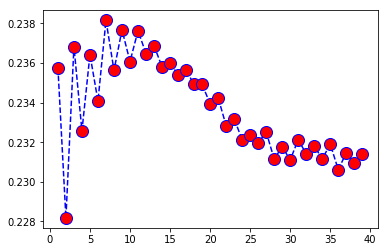

In [25]:
getErrorScoreWithVariableK()

<h3>Considering n_neighbors = 2</h3>

In [26]:
#FUNCTION FOR CALCULATING RESULT IN MOST STANDARD FORMAT
def getScoreMatrix(X_train, y_train, X_test, y_test) :
    startTime = timeit.default_timer()
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     scaler = StandardScaler()
#     scaler.fit(X_test)
#     X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 2, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    print(confusion_matrix(y_test, prediction))
    print ('\n')
    print(classification_report(y_test, prediction))
    return error

In [27]:
datasetError = getScoreMatrix(X_train, y_train, X_test, y_test)

time taken :  69.20334961301342
	Error rate :  0.22817601135557133
[[7938 4895]
 [ 249 9462]]


             precision    recall  f1-score   support

          1       0.97      0.62      0.76     12833
          2       0.66      0.97      0.79      9711

avg / total       0.84      0.77      0.77     22544



In [28]:
scoreTable = data.corr(method='pearson')

In [29]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [30]:
#GETTING FEATURE INDICES
FeatureIndices = scoreTable.index.tolist()

In [31]:
#SORTING FEATURES W.R.T. THEIR CORELATION SCORE
def sortDic(UnsortedDictionary):
    dicItems = [(value,key) for key,value in UnsortedDictionary.items()]
    dicItems.sort()
    dicItems.reverse()
    dicItems = {key:value for value,key in dicItems}
    return dicItems

In [32]:
FeatureScoresForTargetVariable = {}

In [33]:
#GETTING FEATURE CORELATION SCORES WITH TARGET VARIABLE FROM CREATED MATRIX
for i in FeatureIndices[:-1]:
    FeatureScoresForTargetVariable[i] = scoreTable.loc[i][FeatureIndices[-1]]

In [34]:
#SORTING THE FEATURES ACCORDING TO THEIR SCORES WITH TARGET VARIABLE
FeatureScoresForTargetVariable = sortDic(FeatureScoresForTargetVariable)
print(FeatureScoresForTargetVariable)

{'same_srv_rate': 0.7519134368771337, 'dst_host_srv_count': 0.722534932668875, 'dst_host_same_srv_rate': 0.6938028328313153, 'logged_in': 0.6901707395792327, 'flag': 0.5038541851444062, 'service': 0.41503076885396645, 'srv_diff_host_rate': 0.11937718243610351, 'protocol_type': 0.05145584277964115, 'is_guest_login': 0.03927902588041965, 'num_access_files': 0.03669889887642563, 'su_attempted': 0.02244849664625298, 'num_file_creations': 0.021273517007559466, 'root_shell': 0.020285401952686206, 'hot': 0.013077980143829052, 'num_root': 0.011433213319475747, 'num_compromised': 0.010276351108582812, 'num_shells': 0.009471997356932242, 'num_failed_logins': 0.003755073924092788, 'urgent': 0.0027870293388435404, 'is_host_login': 0.0026289159727765237, 'srv_count': -0.0007555083773842414, 'dst_bytes': -0.004389931360945491, 'src_bytes': -0.00588422120093866, 'land': -0.007190758994802398, 'duration': -0.0487913892394794, 'dst_host_srv_diff_host_rate': -0.06233233826781956, 'dst_host_same_src_port

In [40]:
#FUNCTION FOR CALCULATING ERROR VALUE OF EACH FEATURE SUBSET
errorRate = []
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X_train, y_train, X_test, y_test):
    startTime = timeit.default_timer()
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     scaler = StandardScaler()
#     scaler.fit(X_test)
#     X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 25, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    errorRate.append(error)
    return error

In [36]:
#FUNCTION TO GET THE BEST FEATURE TO ADD NEXT IN THE FEATURE SUBSET
Features = list(FeatureScoresForTargetVariable.keys())
def selectNextBestFeature(FeatureSubset, featureIndex) :
    while featureIndex<len(Features):
        checkFeature = Features[featureIndex]
        noMatchWithAnyone = True
        if len(FeatureSubset) == 0:
            noMatchWithAnyone = True
        else:
            for feature in FeatureSubset:
                print('feature:',feature,'\tkey:',checkFeature)
                if(scoreTable.loc[str(feature)][checkFeature] >= 0.7):
                    noMatchWithAnyone = False
                    break          
        if(noMatchWithAnyone == True):
            return checkFeature, featureIndex
        featureIndex += 1

In [37]:
#PROPOSED HYBRID ALGORITHM
def HybridAlgo(allowedError):
#     while noOfFeatures <=36:
    i = 0
    scores = []
    FinalSubset = []
    LeastError = 100
    featureIndex = -1
    noOfFeatures = 3
    while abs(LeastError - datasetError)>allowedError and featureIndex<len(Features)-1:
        while i<noOfFeatures and featureIndex<len(Features):
            Subset = FinalSubset[:]
            feature, featureIndex = selectNextBestFeature(FinalSubset, featureIndex+1 )
            Subset.append(feature)
            error = trainTestScore(X_train.loc[:,Subset], y_train, X_test.loc[:, Subset], y_test)
            if(error < LeastError):
                FinalSubset = Subset[:]
                LeastError = error
                i += 1
            print("feature subset : ",Subset, "error : ", error)
            print("\n\n\nBest feature subset : ",FinalSubset, "error : ", LeastError)
        noOfFeatures += 1
    return FinalSubset

In [41]:
#GETTING THE BEST FEATURE SUBSETS
bestFeatureSubset = HybridAlgo(0.05)

time taken :  21.72620440717583
	Error rate :  0.3237668559261888
feature subset :  ['same_srv_rate'] error :  0.3237668559261888



Best feature subset :  ['same_srv_rate'] error :  0.3237668559261888
feature: same_srv_rate 	key: dst_host_srv_count
feature: same_srv_rate 	key: dst_host_same_srv_rate
feature: same_srv_rate 	key: logged_in
time taken :  16.302275267873483
	Error rate :  0.3279364797728886
feature subset :  ['same_srv_rate', 'logged_in'] error :  0.3279364797728886



Best feature subset :  ['same_srv_rate'] error :  0.3237668559261888
feature: same_srv_rate 	key: flag
time taken :  22.45427647391989
	Error rate :  0.29786195883605393
feature subset :  ['same_srv_rate', 'flag'] error :  0.29786195883605393



Best feature subset :  ['same_srv_rate', 'flag'] error :  0.29786195883605393
feature: same_srv_rate 	key: service
feature: flag 	key: service
time taken :  8.972757087634818
	Error rate :  0.3203069552874379
feature subset :  ['same_srv_rate', 'flag', 'service'] er

In [42]:
#CALCULATING SCORE FOR BEST FEATURE SUBSET
getScoreMatrix(X_train.loc[:,bestFeatureSubset], y_train, X_test.loc[:, bestFeatureSubset], y_test)

time taken :  614.8855492592193
	Error rate :  0.020986919610867533
[[ 24143   1910]
 [  1546 137075]]


             precision    recall  f1-score   support

          0       0.94      0.93      0.93     26053
          1       0.99      0.99      0.99    138621

avg / total       0.98      0.98      0.98    164674

